<a href="https://colab.research.google.com/github/Armeldjogo/NLP/blob/main/NLP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Armel Nsiangani

Student ID#: 001-99-1988


NLP - HW1

Question 1


Write a piece of code using a regular expression in Python to count how many times the following name appears: CICERO, this regex needs to be case-sensitive.

In [ ]:
import re
wordFound = re.compile("CICERO")
with open("/content/hw_1-text.txt") as openfile:
  data = openfile.readlines()

# Question 1
num = 0
for i in range(0,len(data)):
  m3 = re.findall(wordFound,data[i])
  num = num + len(m3)
print('The number of time CICERO appears in file is:', num)

The number of time CICERO appears in file is: 7


Question 2: Write a regular expression in Python that finds all 6 character words found in this play.


In [ ]:
# Question 2
wordOf_six = []
for i in range(0,len(data)):
    m = re.findall(r'\b[a-zA-Z]{6}\b',data[i])
    if len(m) != 0:
      for word in m: 
        wordOf_six.append(word)
print('All 6 character words found in this play are : ')
for ans in set(wordOf_six):
  print(ans)

All 6 character words found in this play are : 
report
fought
glared
People
stream
myself
Sennet
prefer
manner
sister
thrive
making
cloaks
waving
abroad
rheumy
smatch
feeble
hounds
Within
ascend
LUCIUS
voyage
betray
shrewd
makest
Antony
eating
Action
Fulfil
forgot
buffet
acting
repair
hither
masker
sights
Exeunt
waited
tongue
mighty
hearts
Fourth
Struck
resort
greets
endure
mantle
behold
Fellow
stones
banish
expect
spirit
Listen
itself
smiled
Seldom
swords
labour
almost
master
wisely
hanged
repute
appear
attire
unfold
slaves
sorrow
falser
choice
dearer
bestow
verses
steads
Sirrah
struck
charge
Lovers
throat
beaten
barren
sickly
leaden
Unless
pulpit
mother
ensign
rascal
common
suitor
repeal
arrive
wounds
bowels
malice
litter
honest
defend
boldly
silent
sleeve
reason
softly
entire
beside
dagger
chance
wrongs
pieces
troops
CICERO
safety
Before
unborn
vessel
second
temper
squeal
Nervii
wisdom
knotty
afloat
ershot
Caesar
gentle
notest
sports
hollow
follow
ANTONY
listen
narrow
richer
plague


Question 3: Write a piece of code that uses a regular expression in Python to count how many words are capitalized in the first letter only.

In [ ]:
# Question 3
numCap = 0
words_count = 0
for i in range(0,len(data)):
    t = re.findall(r'(\w*)',data[i])
    words_count = words_count + len(t)
    for word in t:
      m = re.findall('[A-Z]+[a-z]+$',word)
      if len(m) != 0:
        numCap = numCap + 1
print('The number of words only capitalized in the first letter are: ',numCap)
print('Total word count: ', words_count)

The number of words only capitalized in the first letter are:  3737
Total word count:  50665


Question 4: Write a regular expression using groups in Python that extracts all phrases that have “son of ” and extract/output the answer in a case-insensitive way.

In [ ]:
# Question 4
print("Words next to 'son of' are: ")
for i in range(0,len(data)):
  m = re.search(r'son of (\S+)', data[i])
  if m:
    x = m.group(1)
    x = re.sub(r'[^\w\s]','',x)
    print(x)

Words next to 'son of' are: 
Rome
the
Caesar
our
Marcus
Marcus


Question 5: Plays are divided in acts, write a regular expression using groups in Python that extracts the number of each act found in this play in a case-sensitive way. 

In [ ]:
# Question 5
print("The numbers of act are: ")
for i in range(0,len(data)):
  m = re.search(r'ACT (\S+)', data[i])
  if m:
    x = m.group(1)
    print(x)

The numbers of act are: 
I
II
III
IV
V


Question 6: Write a Python function that takes the file as an input and outputs how many lines end with: ? , that is a question mark at the end of the line. This function needs to use a regular expression.

In [ ]:
# Question 6
import re
def lineWithQ(fileLocation):
  with open(fileLocation) as openfile:
    data = openfile.readlines()
  sentWithQ = 0
  for i in range(0,len(data)):
    m = re.search(r'\?+$', data[i])
    if m:
      sentWithQ = sentWithQ + 1  
  print('The number of lines ending with ? is: ', sentWithQ)

locationOfFile = "/content/hw_1-text.txt"
lineWithQ(locationOfFile)

The number of lines ending with ? is:  215


Question 7: Using the code from Class 04, train a Random Forest classification model for the same two newsgroups, generate the confusion matrix, and all the same performance metrics.

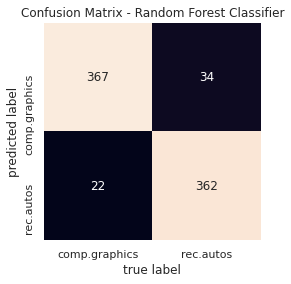

In [ ]:
# Question 7 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix

# Import data
data = fetch_20newsgroups()
data.target_names
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# Make model & fit
model = make_pipeline(CountVectorizer(), RandomForestClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

# Create confusion matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
# Print Performance
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

Accuracy: 0.9286624203821656
Precision: 0.9427083333333334
Recall: 0.9141414141414141
F1 Score: 0.9286595261278807
Mean Absolute Error: 0.07133757961783439
Mean Squared Error: 0.07133757961783439
Root Mean Squared Error: 0.26709095757407136


Bonus: Using the code from Class 04. Write a function to find the best
performing model for the TF-IDF vectorization.

In [34]:
#import
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd


# Create DataFrame  
# Row 1: F-1 score
# Row 2: Accuracy
dataFrame = pd.DataFrame(np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]),
                   columns=['MultinomialNB %','Perceptron %', 'LogisticRegression %', 'SVM %','Random Forests %'])
frameHead = ['MultinomialNB %','Perceptron %', 'LogisticRegression %', 'SVM %','Random Forests %']

# Populate DataFrame with Training and testing data 
data = fetch_20newsgroups()
data.target_names
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


# Compute F-1 and Accuracy score by passing DataFrame
# create the models
model_1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_2 = make_pipeline(TfidfVectorizer(), Perceptron())
model_3 = make_pipeline(TfidfVectorizer(), LogisticRegression())
model_4 = make_pipeline(TfidfVectorizer(), SVC())
model_5 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

models = [model_1, model_2, model_3, model_4, model_5]
mod_it = 0
test_f1 = 0
test_acc = 0
max_f1 = ''
max_acc = ''

for head in frameHead:
  model = models[mod_it] 
  model.fit(train.data, train.target)
  labels = model.predict(test.data)

  dataFrame[head][0] = 100*f1_score(labels, test.target, average='macro')
  dataFrame[head][1] = 100*accuracy_score(test.target,labels)
  mod_it = mod_it + 1
  
  if dataFrame[head][0] > test_f1:
    test_f1 = dataFrame[head][0]
    max_f1 = head
  if dataFrame[head][1] > test_acc:
    test_acc = dataFrame[head][1]
    ind_max_f1 = head


print(dataFrame)
print('-------------------------------------------------------')
print('Based on F1 the best performing TF-IDF vect. model is: ',max_f1[:-1])
print('Based on Accuracy the best performing TF-IDF vect. model is: ',max_f1[:-1])


   MultinomialNB %  Perceptron %  LogisticRegression %  SVM %  Random Forests %
0               94            94                    95     96                92
1               94            94                    95     96                92
-------------------------------------------------------
Based on F1 the best performing TF-IDF vect. model is:  SVM 
Based on Accuracy the best performing TF-IDF vect. model is:  SVM 
